<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/newps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

!pip install mapclassify
import mapclassify

import re, json, requests
import plotly.express as px
from urllib.request import urlopen
import json

In [ ]:
! wget -q -O nyc1.zip https://github.com/iyeboah22/GIS-DS/raw/main/CHS_2009_DOHMH_2010B.zip

zip_ref = zipfile.ZipFile('nyc1.zip', 'r');
zip_ref.extractall();
zip_ref.close();

nyc_boro1 = gpd.read_file('CHS_2009_DOHMH_2010B/CHS_2009_DOHMH_2010B.shp')

In [48]:
nyc_boro1 = nyc_boro1[['FIRST_BORO', 'SHAPE_Leng', 'SHAPE_Area', 'geometry']]

In [49]:
nyc_boro1.rename(columns = {'FIRST_BORO':'Borough'}, inplace = True)
nyc_boro1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Borough     35 non-null     object  
 1   SHAPE_Leng  35 non-null     float64 
 2   SHAPE_Area  35 non-null     float64 
 3   geometry    35 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.2+ KB


In [ ]:
nyc_boro1.plot()

In [76]:
! wget -q -O NYC_Population.csv https://github.com/iyeboah22/GIS-DS/raw/main/NYC_Population.csv
nyc_data = pd.read_csv('NYC_Population.csv')

In [77]:
nyc_data = nyc_data[['Borough', '2020'] ]
nyc_data = nyc_data.drop(0, axis='index')
nyc_data.info()
#filter data set to show only key columns...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Borough  5 non-null      object
 1   2020     5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [ ]:
nyc_pop = nyc_boro1.merge(nyc_data, on='Borough',how='outer',indicator=False)
nyc_pop.head(2)
#why is 2020 coming out as NaN ive tried different ways to merge but its still coming out as NaN


<Axes: >

[]

[]

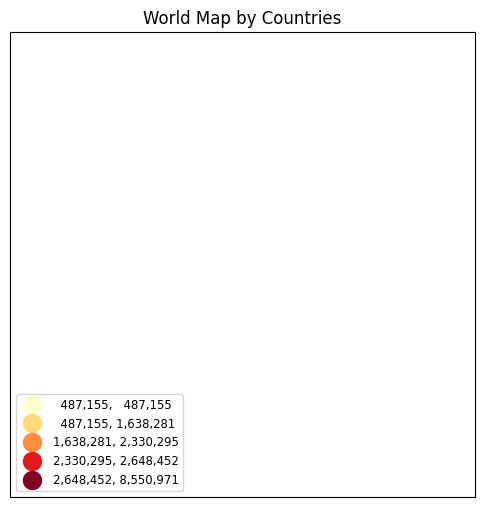

In [44]:
fig, ax = plt.subplots(1, figsize=(6,10))
nyc_pop.plot(ax=ax,column='2020',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("World Map by Countries")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [8]:

! wget -q -O Demographic_Borough.csv https://github.com/iyeboah22/GIS-DS/raw/main/20-21_Demographic_Borough.csv
nyc_demo = pd.read_csv('Demographic_Borough.csv')

In [ ]:
nyc_demo.head()

In [ ]:
country_mh = mh_data.merge(countries_coord, on='name',how='outer',indicator=True)
mh_data = mh_data[mh_data['year']=='2017']